##### Imports

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [27]:
VERSION = 'defined_state_4' # spread.shifting.hedging.position.liquidity
PATH = f'{VERSION}/'
try:
    os.mkdir(PATH)
except:
    print('Directory already exists')

Directory already exists


### Visualisations

##### Market state against market

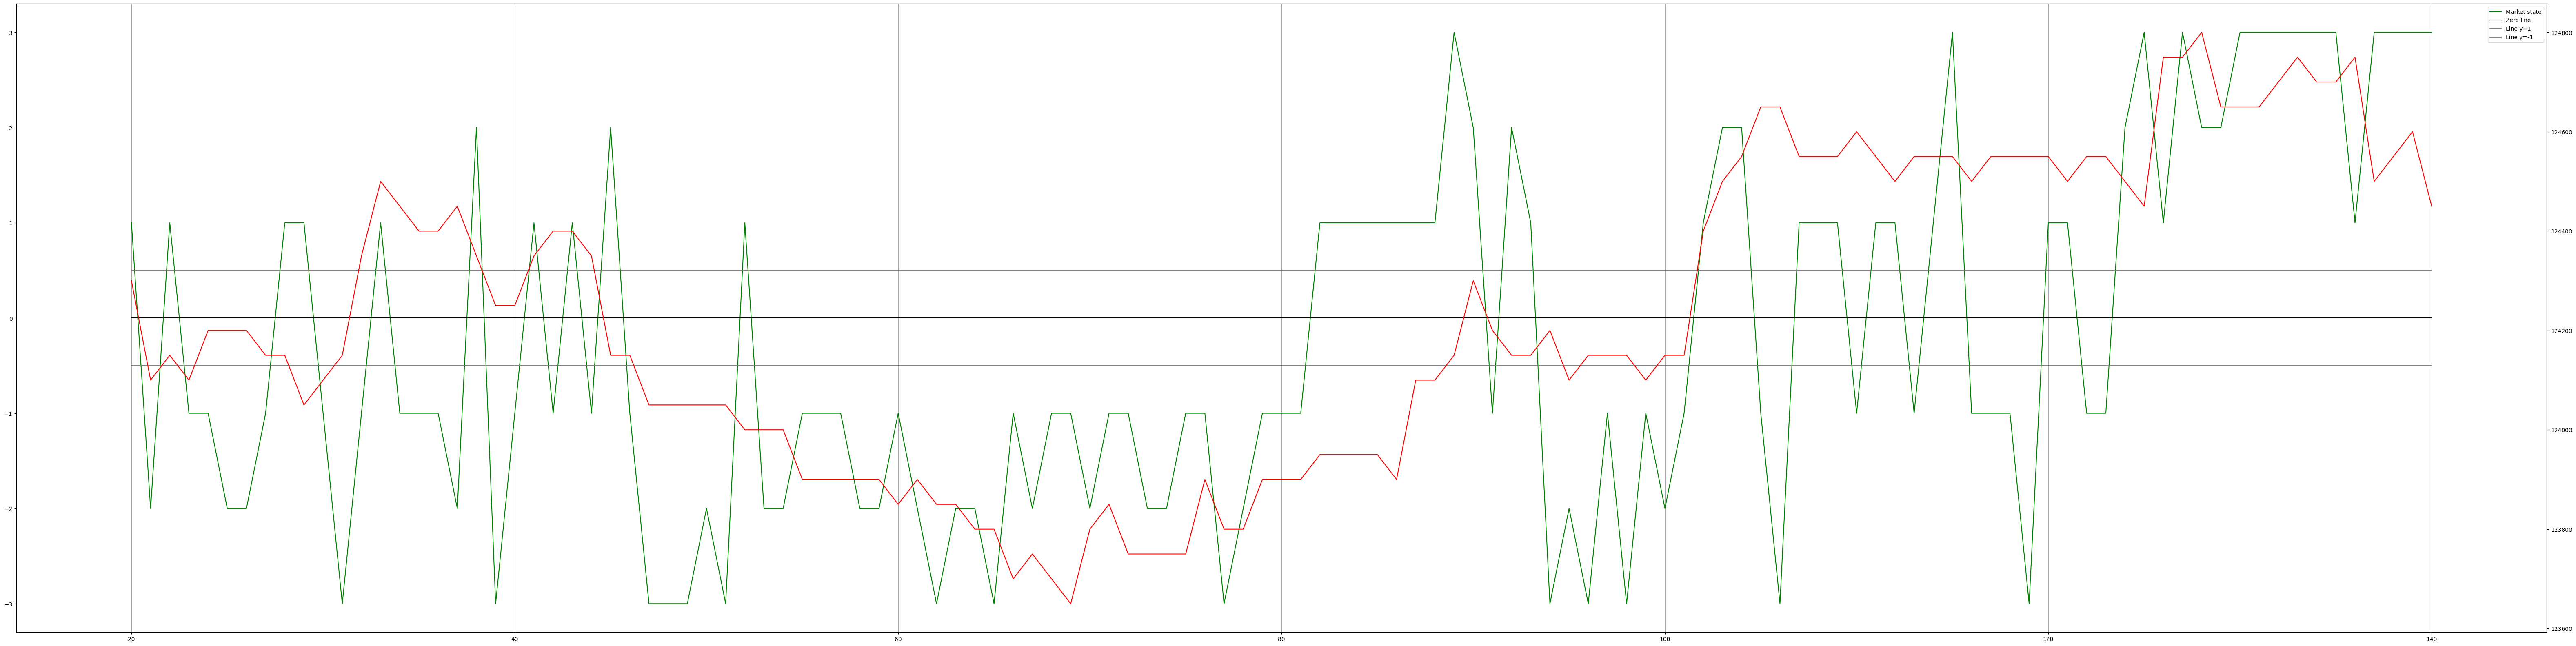

In [31]:
inputs = pd.read_csv('../output/inputs.csv')
# Drop the first 20 rows
inputs = inputs.iloc[20:]
plt.plot(inputs.index, inputs['market_state'], label='Market state', color='green')
plt.plot(inputs.index, [0] * len(inputs.index), label='Zero line', color='black')
plt.plot(inputs.index, [1/2] * len(inputs.index), label='Line y=1', color='grey')
plt.plot(inputs.index, [-1/2] * len(inputs.index), label='Line y=-1', color='grey')
# Plot grid with lines closer together
plt.grid(which='both', axis='x', linestyle='-', linewidth='0.5', color='grey')

plt.legend()
plt2 = plt.twinx()
plt2.plot(inputs.index, inputs['avg_price'], label='Average price', color='red')

plt.rcParams["figure.figsize"] = (80, 20)
plt.savefig(f'{PATH}market_state-price.png')
plt.show()

##### Bid-Ask Spread against position

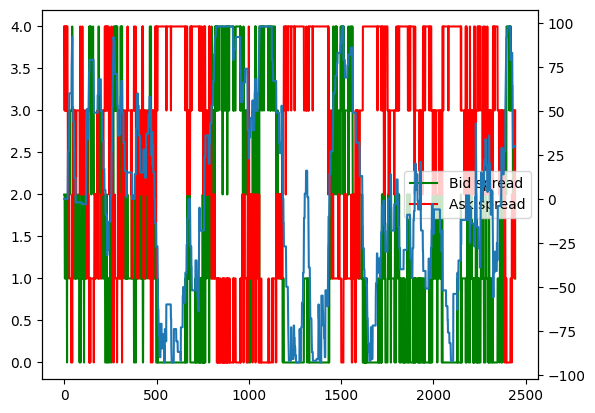

In [3]:
inputs = pd.read_csv('../output/inputs.csv')

# Drop the first 500 rows
# inputs = inputs.iloc[500:][::4] 



plt.plot(inputs.index, inputs['bid_spread'], label='Bid spread', color='green')
plt.plot(inputs.index, inputs['ask_spread'], label='Ask spread', color='red')
plt.legend()
plt2 = plt.twinx()
plt2.plot(inputs.index, inputs['position'], label='Position')

# plt3 = plt.twinx()
# plt3.plot(inputs.index, inputs['bid_liquidity'], label='Spread')

plt.rcParams["figure.figsize"] = (80,20)
plt.savefig(f'{PATH}spread-position.png')
plt.show()

##### Market against positions

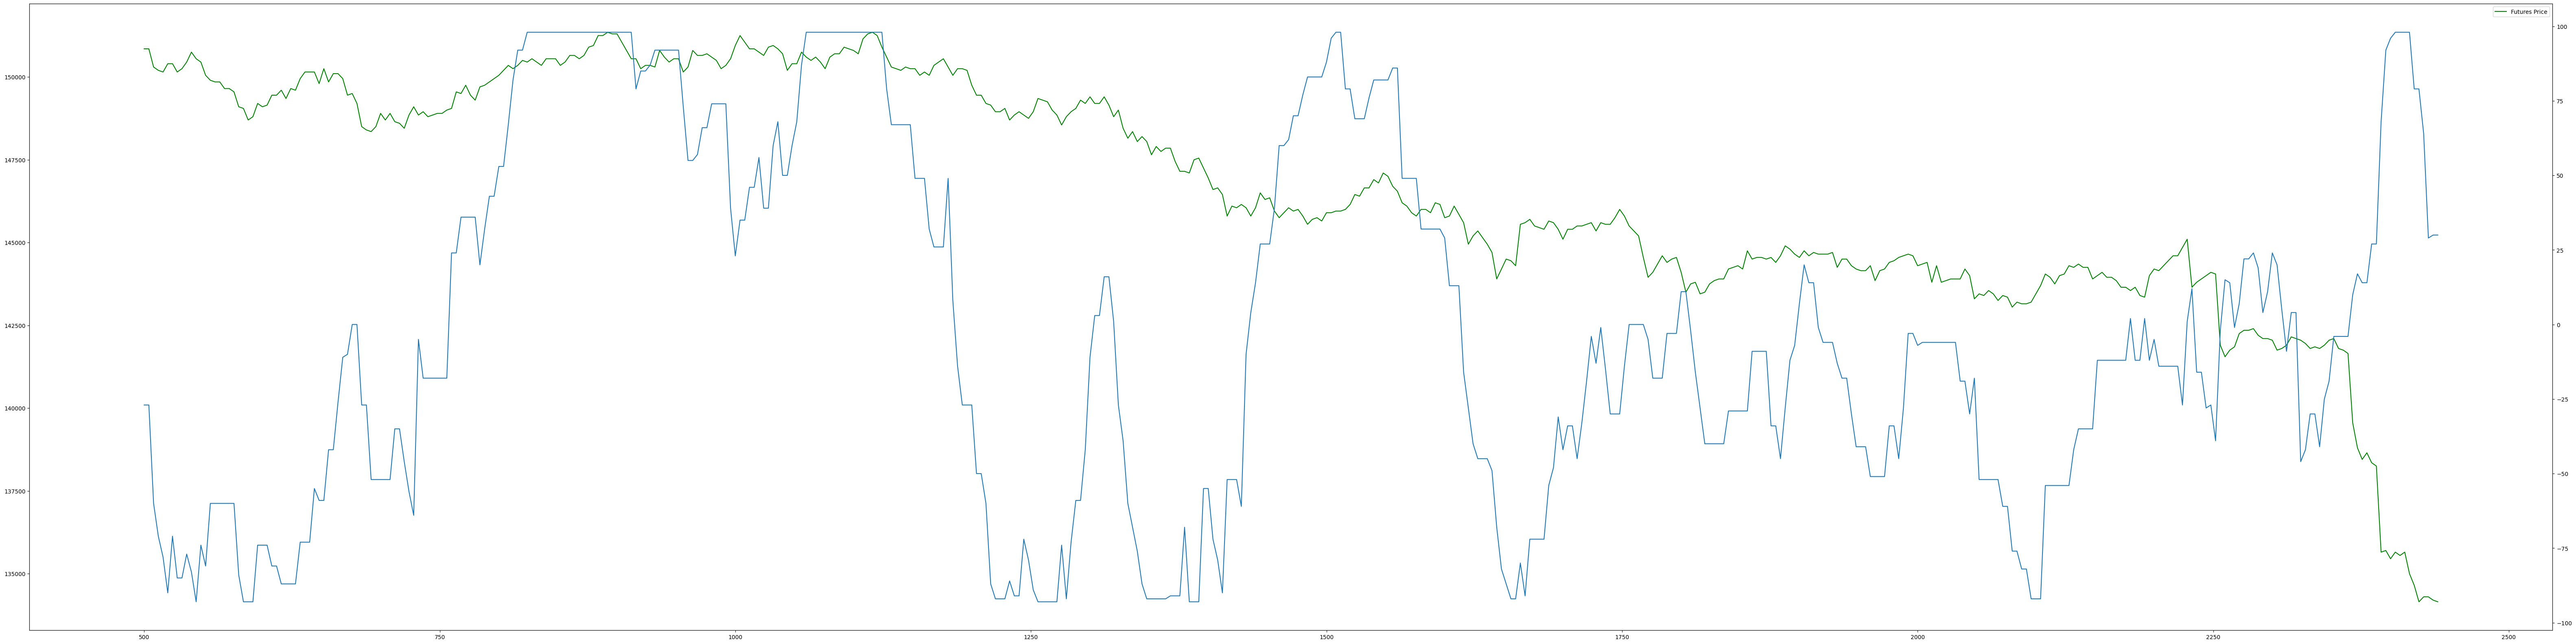

In [5]:
inputs = pd.read_csv('../output/inputs.csv')

# Drop the first 500 rows
inputs = inputs.iloc[500:][::4] 



plt.plot(inputs.index, inputs['avg_price'], label='Futures Price', color='green')
# plt.plot(inputs.index, inputs['ETF_avg'], label='ETF Price', color='red')
plt.legend()
plt2 = plt.twinx()
plt2.plot(inputs.index, inputs['position'], label='Position')

# plt3 = plt.twinx()
# plt3.plot(inputs.index, inputs['bid_liquidity'], label='Spread')

plt.rcParams["figure.figsize"] = (80,20)
# plt.savefig(f'{PATH}market.png')
plt.show()

##### P&L against market

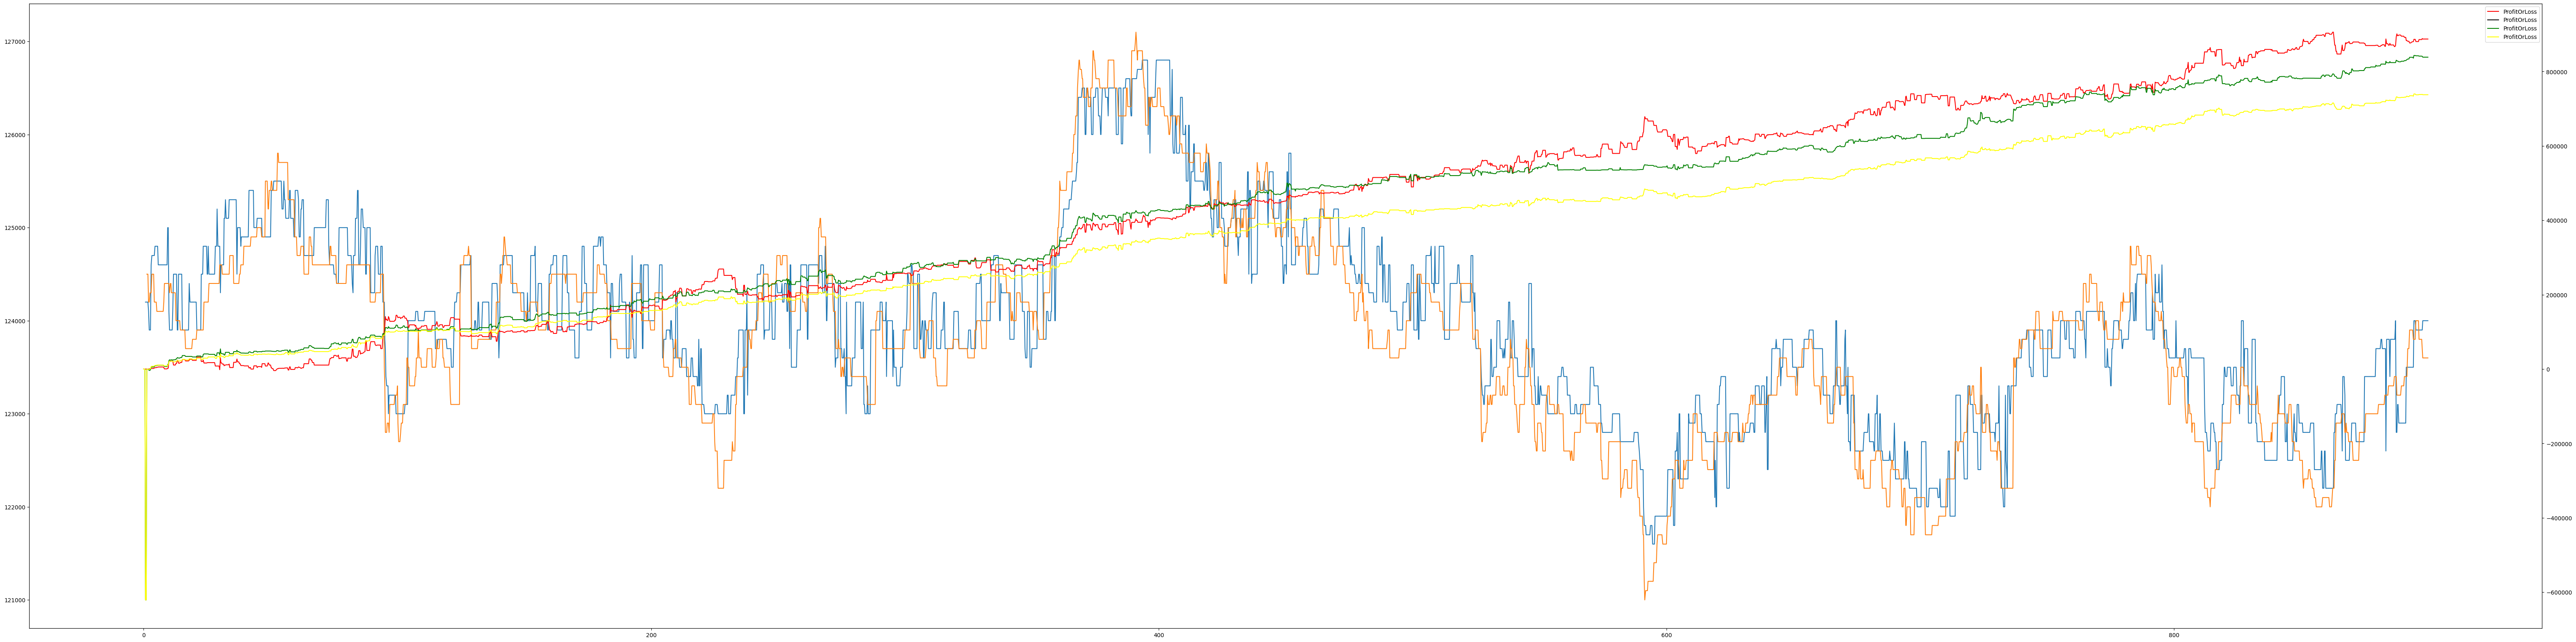

In [48]:
df = pd.read_csv('../score_board.csv')
df.head()
plt.plot(df['Time'], df['EtfPrice'], label='EtfPrice')
plt.plot(df['Time'], df['FuturePrice'], label='FuturePrice')

df1 = df[df['Team'] == 'Emineminem']
df2 = df[df['Team'] == 'AdvancedL']
ax2 = plt.twinx()
ax2.plot(df1['Time'], df1['ProfitOrLoss'], label='ProfitOrLoss', color='red')
ax2.plot(df2['Time'], df2['ProfitOrLoss'], label='ProfitOrLoss', color='black')
ax2.plot(df1['Time'], df[df['Team']=='SimpleL']['ProfitOrLoss'], label='ProfitOrLoss', color='green')
ax2.plot(df1['Time'], df[df['Team']=='Benchmark']['ProfitOrLoss'], label='ProfitOrLoss', color='yellow')
# only plot rows where Team is Team1
plt.rcParams["figure.figsize"] = (80,20)
plt.legend()
plt.savefig(PATH + 'p&l.png')
plt.show()


##### Investigating liquidity

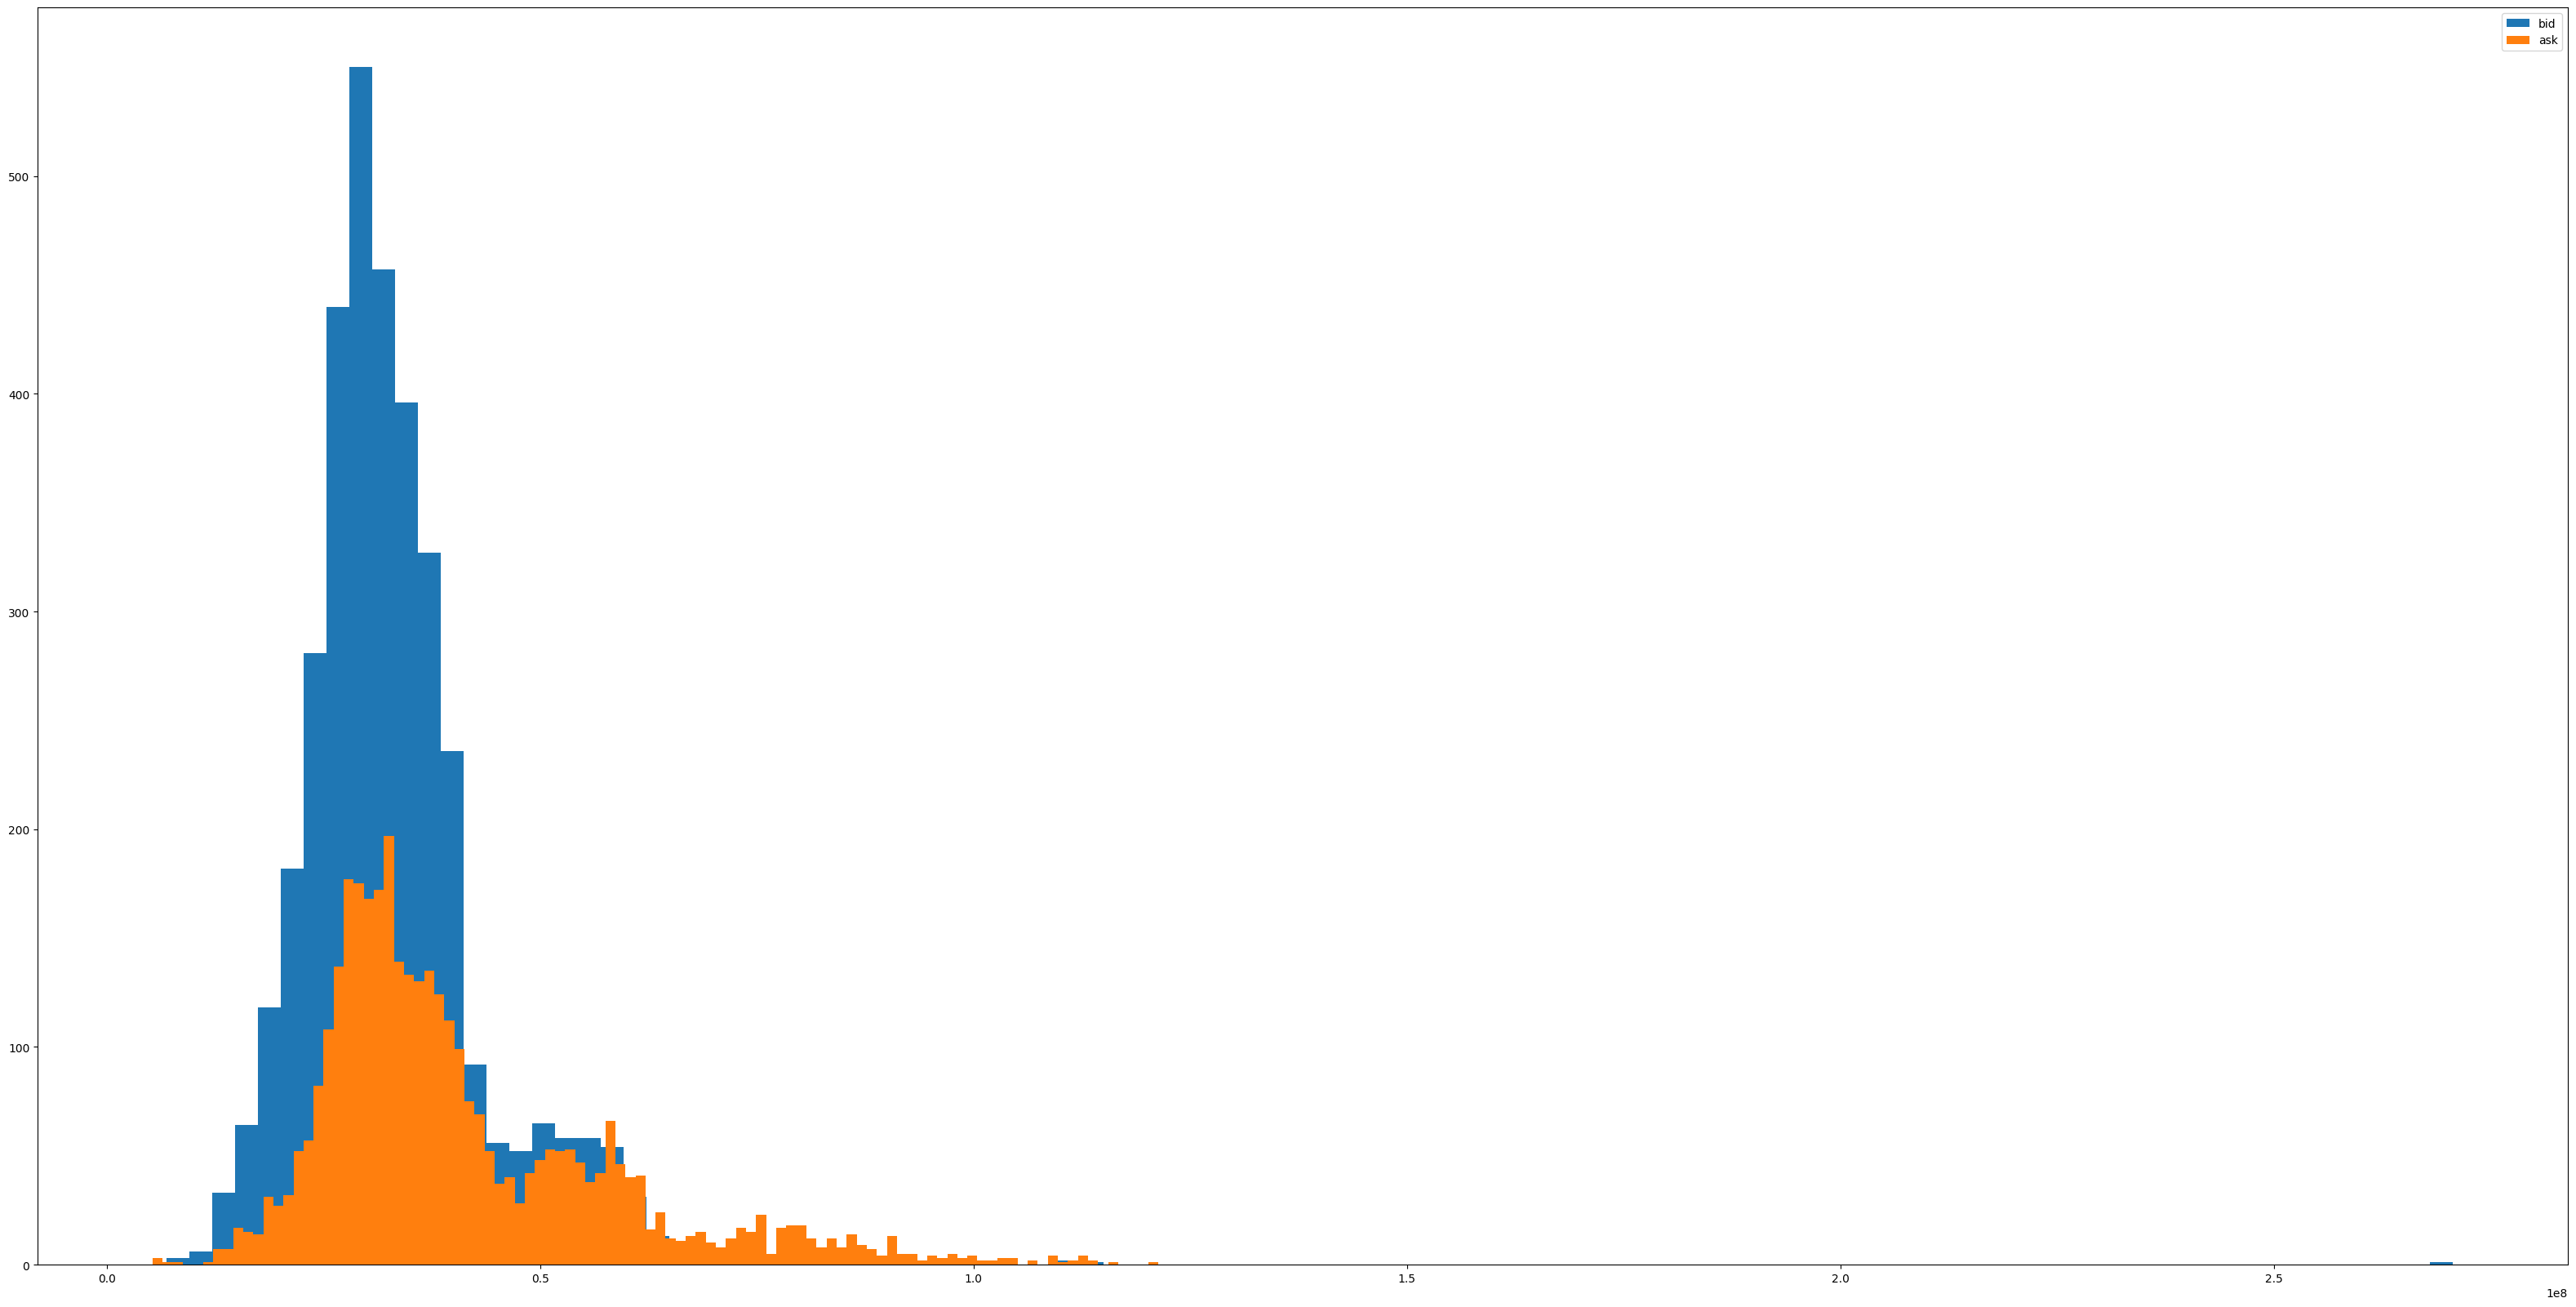

In [57]:
plt.hist(inputs['bid_liquidity'], bins=100, label='bid')
plt.hist(inputs['ask_liquidity'], bins=100, label='ask')
plt.legend()
plt.show()

### Investigating volatility

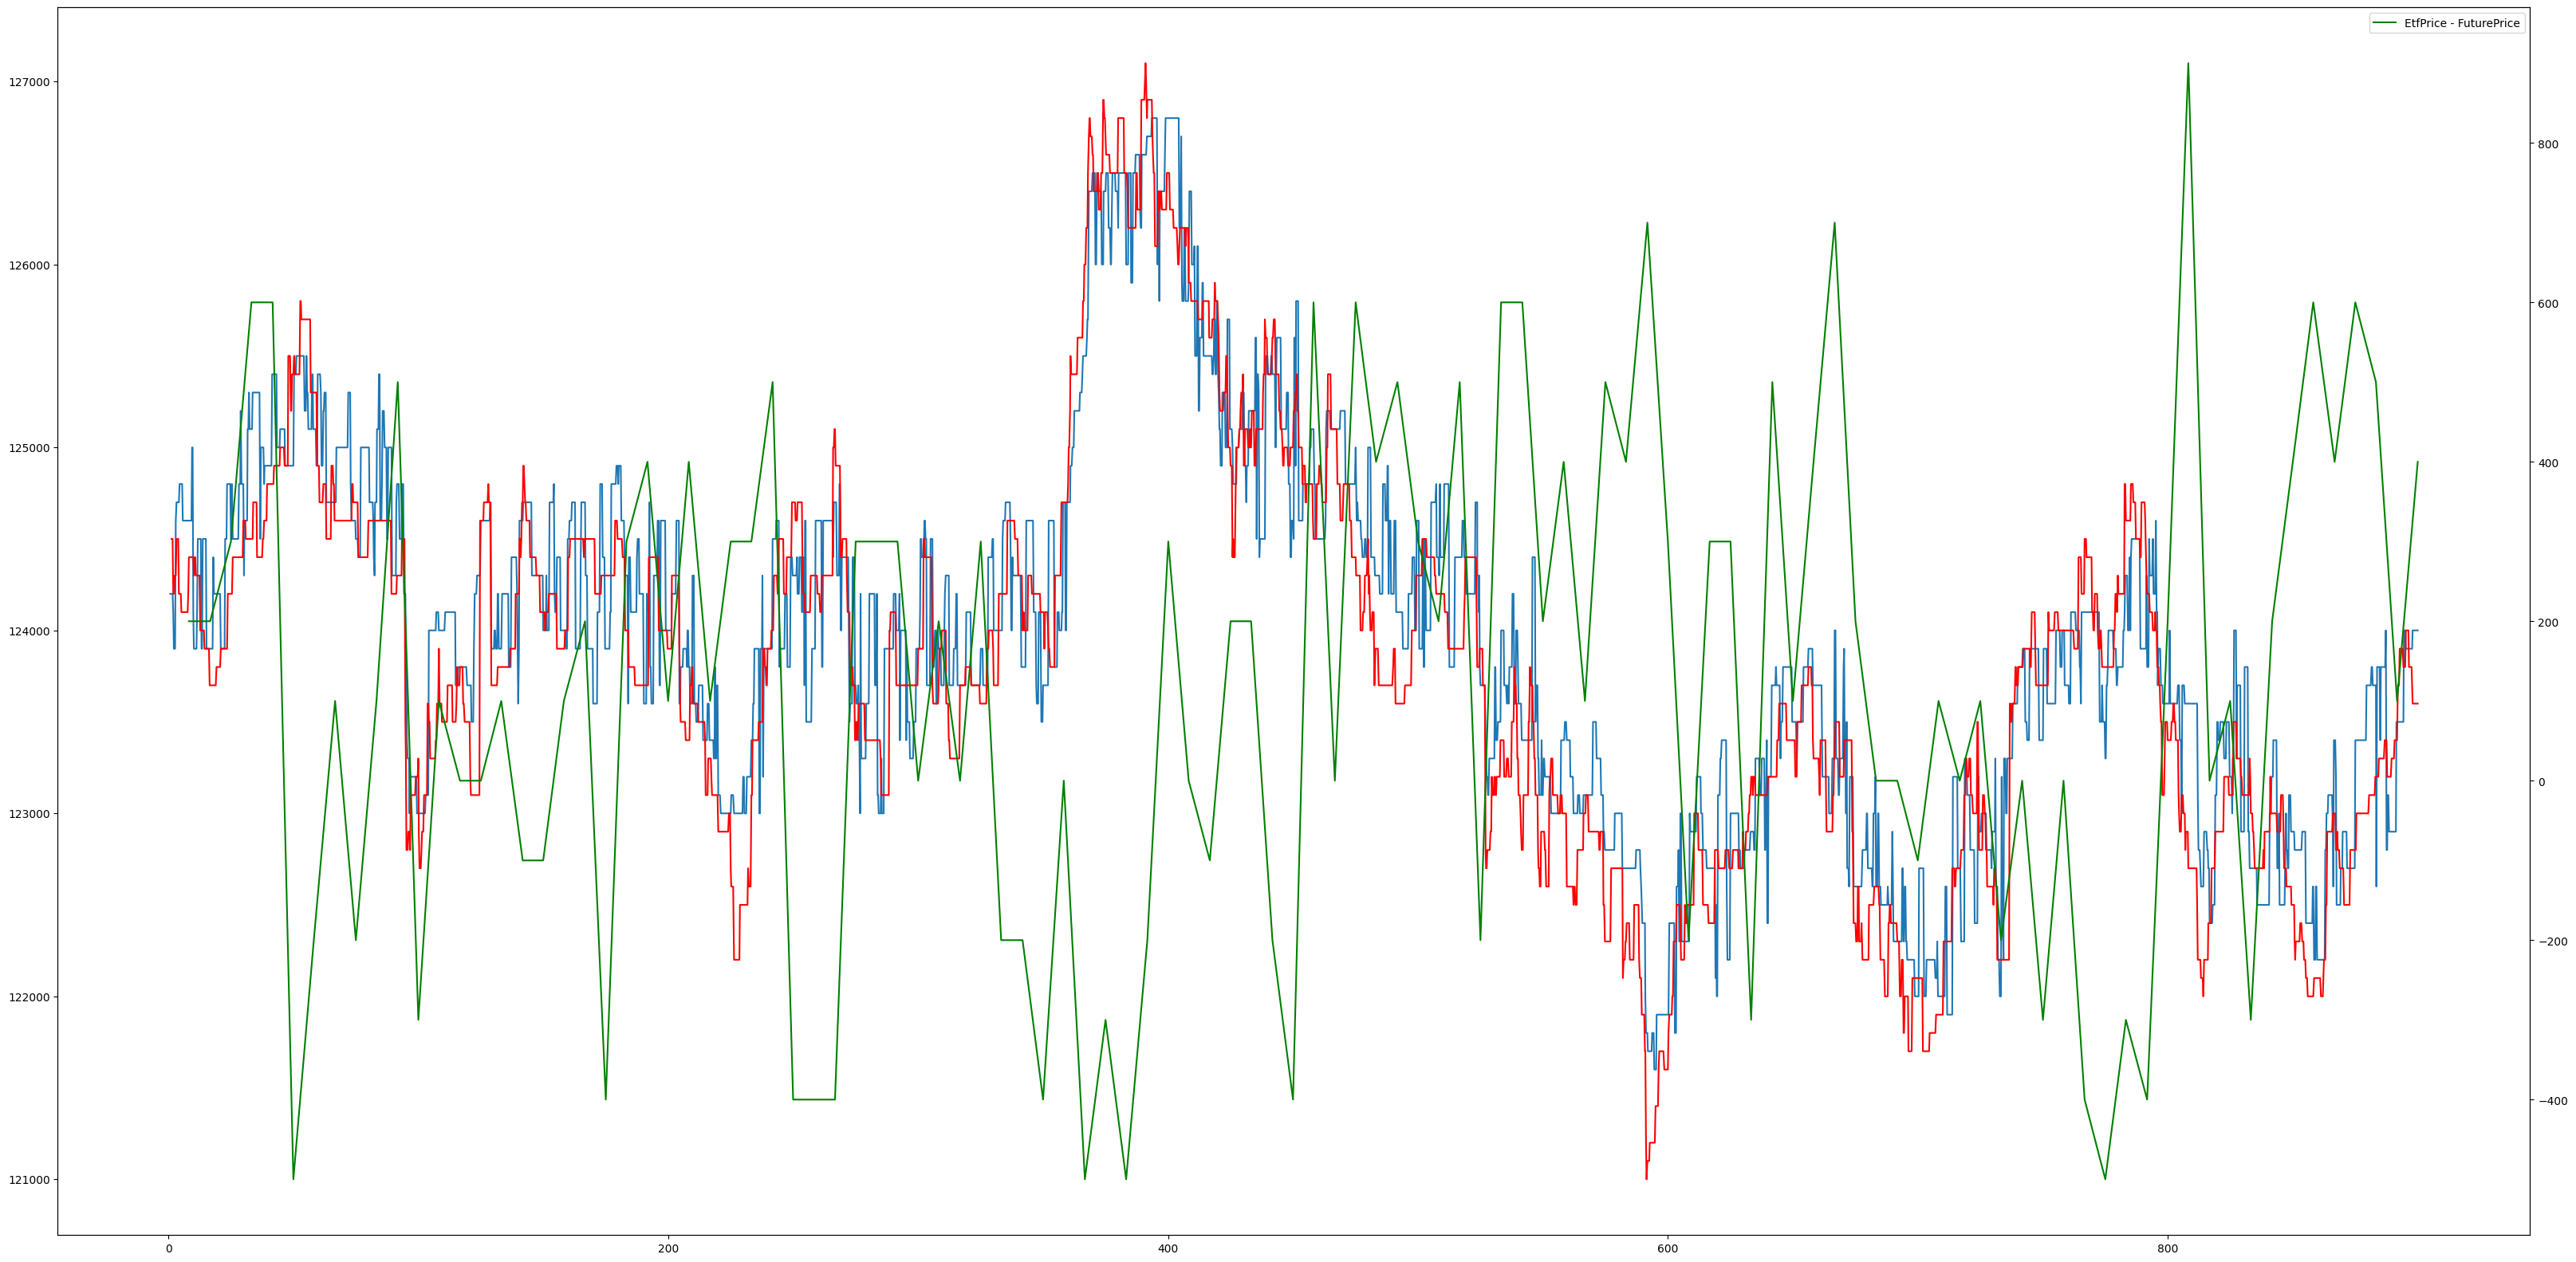

In [58]:
PL = pd.read_csv('../score_board.csv')
# drop first row of PL dataframe
PL = PL.drop(PL.index[0])
# plot EtfPrice and FuturePrice
plt.plot(PL['Time'], PL['EtfPrice'], label='EtfPrice')
plt.plot(PL['Time'], PL['FuturePrice'], label='FuturePrice', color='red')
# on a different axis plot the difference between EtfPrice and FuturePrice
ax2 = plt.twinx()
ax2.plot(PL['Time'][::100], PL['EtfPrice'][::100] - PL['FuturePrice'][::100], label='EtfPrice - FuturePrice', color='green')
# only plot every 100th row
plt.legend()
# increase the size of the plot
plt.rcParams["figure.figsize"] = (40,20)
plt.show()
